In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

script_dir = os.path.dirname(os.path.abspath(__file__))

# Build the full path to the dataset
dataset_path = os.path.join(script_dir, "TMDB_movie_dataset_v11.csv")
movies_df = pd.read_csv(dataset_path)

print("total entries:")
print(movies_df.size)

print("Entries with missing data:")
print(movies_df.isnull().sum())






total entries:
27449304
Entries with missing data:
id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             189906
revenue                       0
runtime                       0
adult                         0
backdrop_path            840719
budget                        0
homepage                1022765
imdb_id                  539219
original_language             0
original_title               13
overview                 233300
popularity                    0
poster_path              362335
tagline                  983426
genres                   459464
production_companies     628408
production_countries     508068
spoken_languages         488574
keywords                 834664
dtype: int64


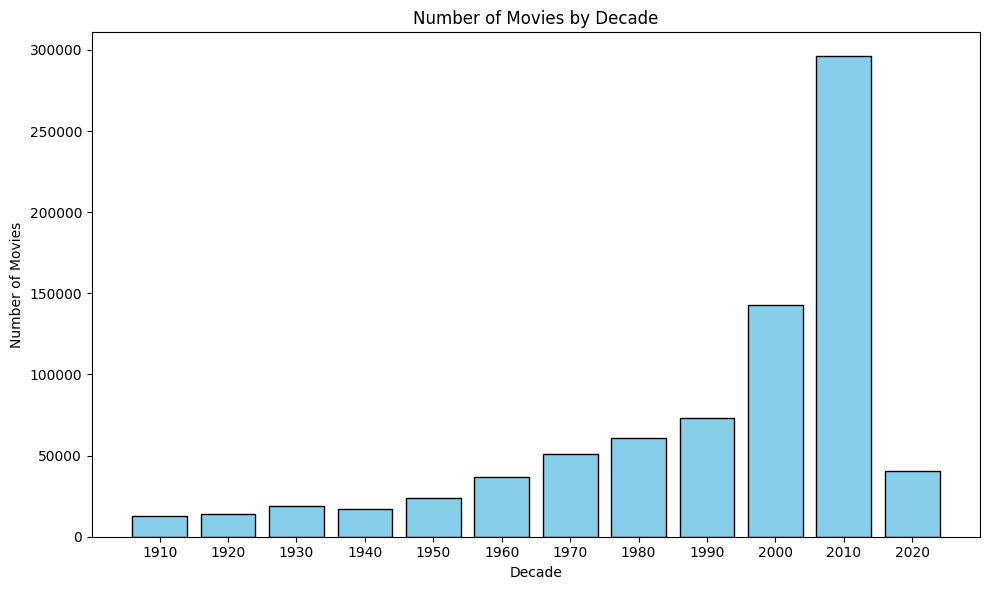

In [ ]:
#NUMBER OF MOVIES PER DECADE

movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")
movies_df["release_year"] = movies_df["release_date"].dt.year
movies_df = movies_df[(movies_df['release_year'] >= 1910) & (movies_df['release_year'] <= 2020)]
movies_df["decade"] = (movies_df["release_year"] // 10) * 10

movies_per_decade = movies_df['decade'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(movies_per_decade.index, movies_per_decade.values, width=8, color='skyblue', edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Decade')
plt.xticks(movies_per_decade.index)
plt.tight_layout()

#plt.savefig("movies_by_decade.jpg")
plt.show()

/var/folders/x6/xjk7v9wj6gb_3wsz9w9k3bmm0000gn/T/ipykernel_32469/3146711268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["budget_millions"] = filtered_df["budget"] / 1e6
/var/folders/x6/xjk7v9wj6gb_3wsz9w9k3bmm0000gn/T/ipykernel_32469/3146711268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["revenue_millions"] = filtered_df["revenue"] / 1e6


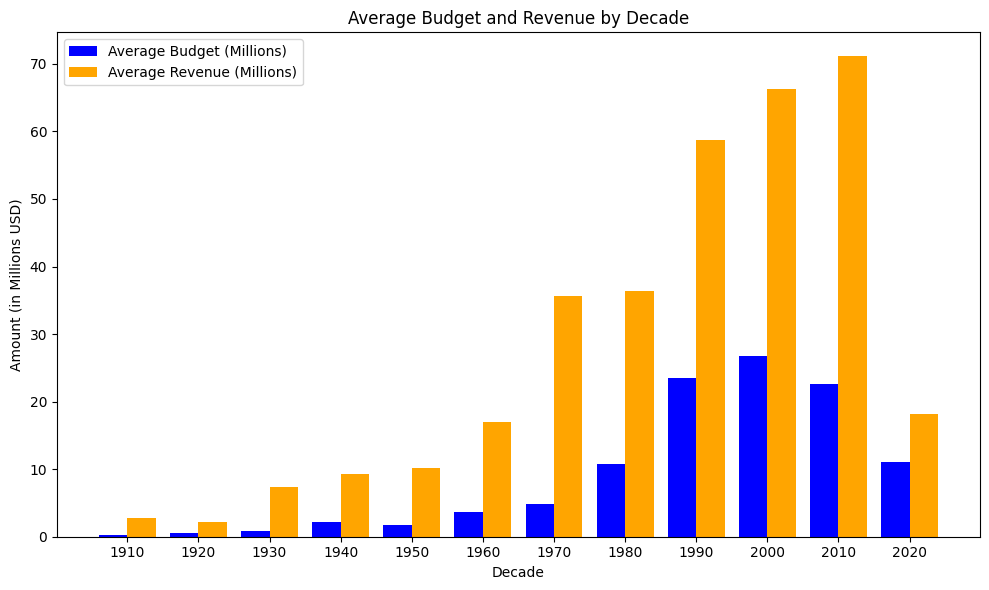

In [ ]:
#REVENUE AND BUDGET BY DECADE

# Remove rows with missing or invalid data for budget or revenue
filtered_df = movies_df[(movies_df["budget"] > 0) & (movies_df["revenue"] > 0)]

# Normalize budget and revenue to the same scale (millions of dollars)
filtered_df["budget_millions"] = filtered_df["budget"] / 1e6
filtered_df["revenue_millions"] = filtered_df["revenue"] / 1e6


decade_stats = filtered_df.groupby("decade").agg(
    avg_budget=("budget_millions", "mean"),
    avg_revenue=("revenue_millions", "mean"),
    movie_count=("title", "count"),
).reset_index()

# Plot average budget and revenue by decade
plt.figure(figsize=(10, 6))
bar_width = 4
plt.bar(decade_stats["decade"] - bar_width / 2, decade_stats["avg_budget"], width=bar_width, label="Average Budget (Millions)", color="blue")
plt.bar(decade_stats["decade"] + bar_width / 2, decade_stats["avg_revenue"], width=bar_width, label="Average Revenue (Millions)", color="orange")
plt.xlabel("Decade")
plt.ylabel("Amount (in Millions USD)")
plt.title("Average Budget and Revenue by Decade")
plt.xticks(decade_stats["decade"])
plt.legend()
plt.tight_layout()
#plt.savefig("avg_budget_and_revenue_by_decade.jpg")
plt.show()
plt.close()




/var/folders/x6/xjk7v9wj6gb_3wsz9w9k3bmm0000gn/T/ipykernel_32469/1421046670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["score_group"] = filtered_df["vote_average"].apply(lambda x: f"{int(x)}-{int(x)+1}" if pd.notnull(x) else "Unknown")


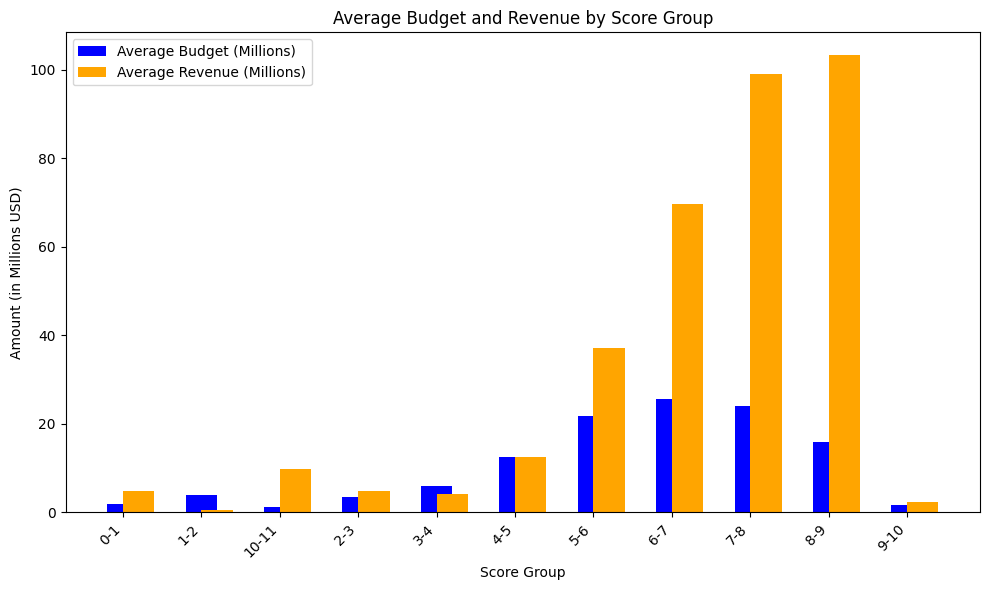

In [ ]:

#REVENUE AND BUDGET BY SCORE

filtered_df["score_group"] = filtered_df["vote_average"].apply(lambda x: f"{int(x)}-{int(x)+1}" if pd.notnull(x) else "Unknown")



score_stats = filtered_df.groupby("score_group").agg(
    avg_budget=("budget_millions", "mean"),
    avg_revenue=("revenue_millions", "mean"),
    movie_count=("title", "count"),
).reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(score_stats["score_group"], score_stats["avg_budget"], width=bar_width, label="Average Budget (Millions)", color="blue", align="center")
plt.bar(score_stats["score_group"], score_stats["avg_revenue"], width=bar_width, label="Average Revenue (Millions)", color="orange", align="edge")
plt.xlabel("Score Group")
plt.ylabel("Amount (in Millions USD)")
plt.title("Average Budget and Revenue by Score Group")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
#plt.savefig("budget_revenue_by_score.jpg")
plt.show()
plt.close()

/var/folders/x6/xjk7v9wj6gb_3wsz9w9k3bmm0000gn/T/ipykernel_32469/1662431603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["genres_list"] = filtered_df["genres"].apply(


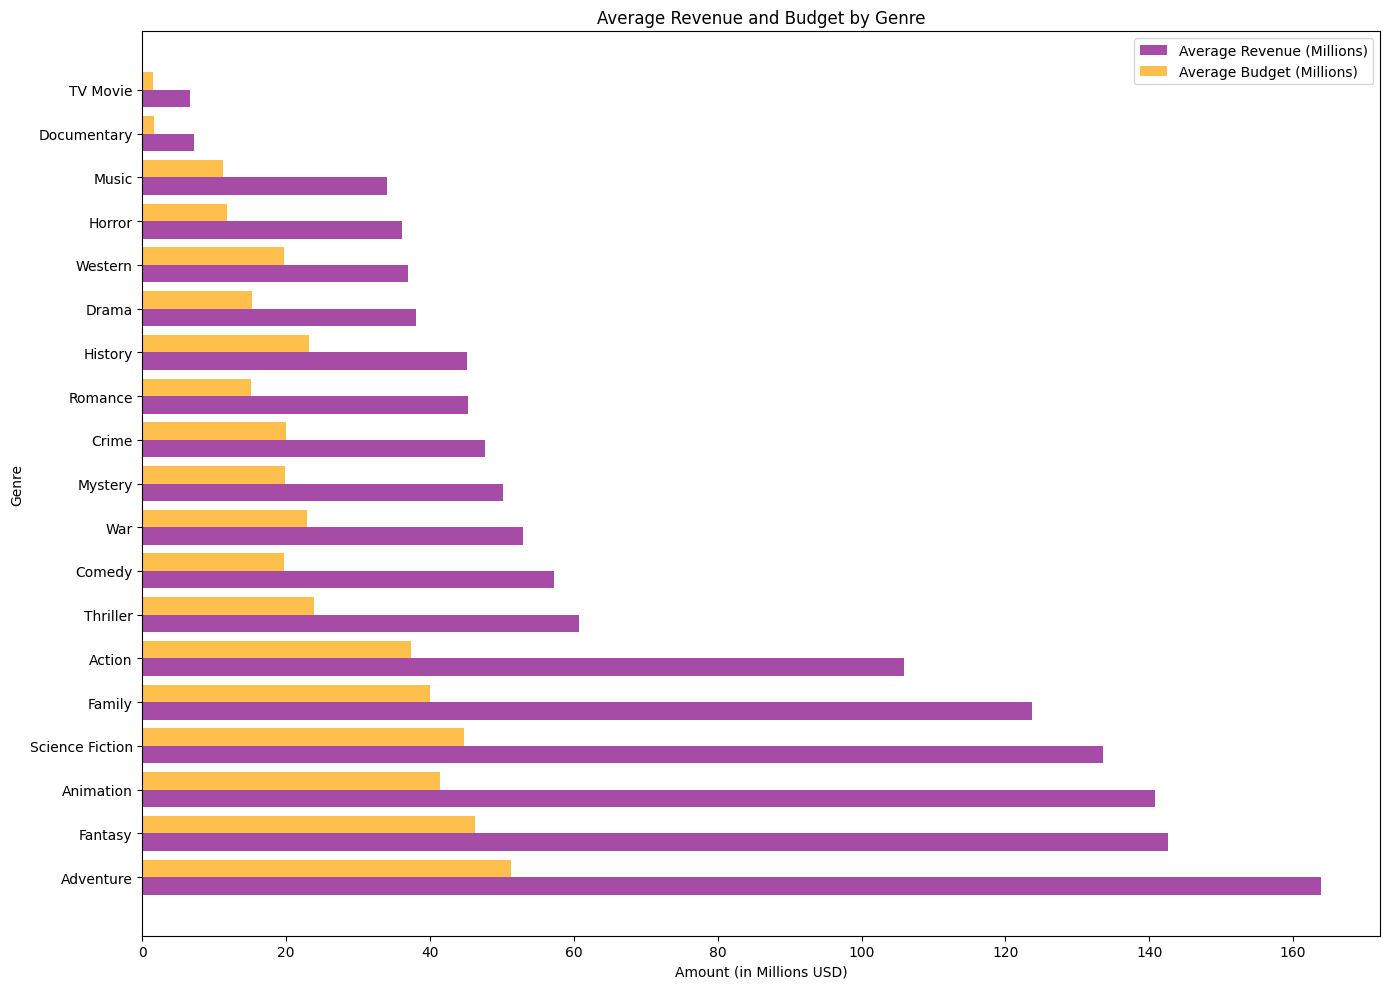

In [ ]:
#REVENUE AND BUDGET BY GENRE

filtered_df["genres_list"] = filtered_df["genres"].apply(
    lambda x: [genre.strip() for genre in x.split(",")] if pd.notnull(x) else []
)
genres_df = filtered_df.explode("genres_list")

# Group by genre and calculate average revenue and average budget
genre_stats = genres_df.groupby("genres_list").agg(
    avg_revenue=("revenue_millions", "mean"),
    avg_budget=("budget_millions", "mean")
).reset_index()

# Sort by average revenue in descending order
genre_stats = genre_stats.sort_values(by="avg_revenue", ascending=False)

# Plot genres with their average revenues and budgets
plt.figure(figsize=(14, 10))
bar_width = 0.4
index = range(len(genre_stats))

plt.barh(
    index,
    genre_stats["avg_revenue"],
    bar_width,
    label="Average Revenue (Millions)",
    color="purple",
    alpha=0.7
)
plt.barh(
    [i + bar_width for i in index],
    genre_stats["avg_budget"],
    bar_width,
    label="Average Budget (Millions)",
    color="orange",
    alpha=0.7
)

# Add labels, title, and legend
plt.yticks([i + bar_width / 2 for i in index], genre_stats["genres_list"])
plt.xlabel("Amount (in Millions USD)")
plt.ylabel("Genre")
plt.title("Average Revenue and Budget by Genre")
plt.legend()
plt.tight_layout()
#plt.savefig("revenue_budget_by_genre.jpg")
plt.show()



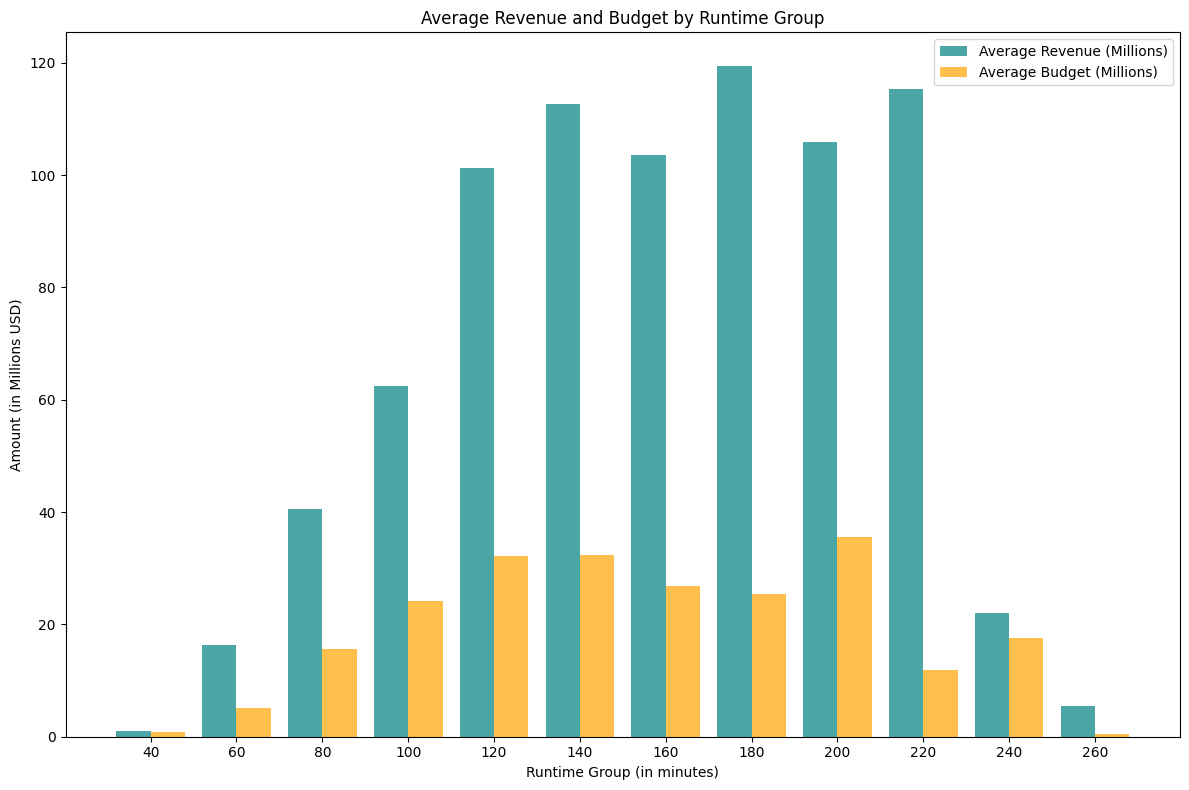

In [ ]:
#REVENUE AND BUDGET BY LENGTH OF MOVIE

filtered_df = filtered_df[(filtered_df["runtime"] >= 40) & (filtered_df["runtime"] <= 280)]

# Group runtimes based on 20-minute intervals and calculate average revenues and budgets
filtered_df["runtime_group"] = (filtered_df["runtime"] // 20) * 20
runtime_stats = filtered_df.groupby("runtime_group").agg(
    avg_budget=("budget_millions", "mean"),
    avg_revenue=("revenue_millions", "mean")
).reset_index()

# Plot the average revenue and budget by runtime group
plt.figure(figsize=(12, 8))
bar_width = 8

# Revenue bars
plt.bar(
    runtime_stats["runtime_group"] - bar_width / 2,
    runtime_stats["avg_revenue"],
    width=bar_width,
    color="teal",
    alpha=0.7,
    label="Average Revenue (Millions)"
)

# Budget bars
plt.bar(
    runtime_stats["runtime_group"] + bar_width / 2,
    runtime_stats["avg_budget"],
    width=bar_width,
    color="orange",
    alpha=0.7,
    label="Average Budget (Millions)"
)

# Add labels, title, and legend
plt.xlabel("Runtime Group (in minutes)")
plt.ylabel("Amount (in Millions USD)")
plt.title("Average Revenue and Budget by Runtime Group")
plt.xticks(runtime_stats["runtime_group"])
plt.legend()
plt.tight_layout()
#plt.savefig("budget_revenue_by_runtime.jpg")
plt.show()





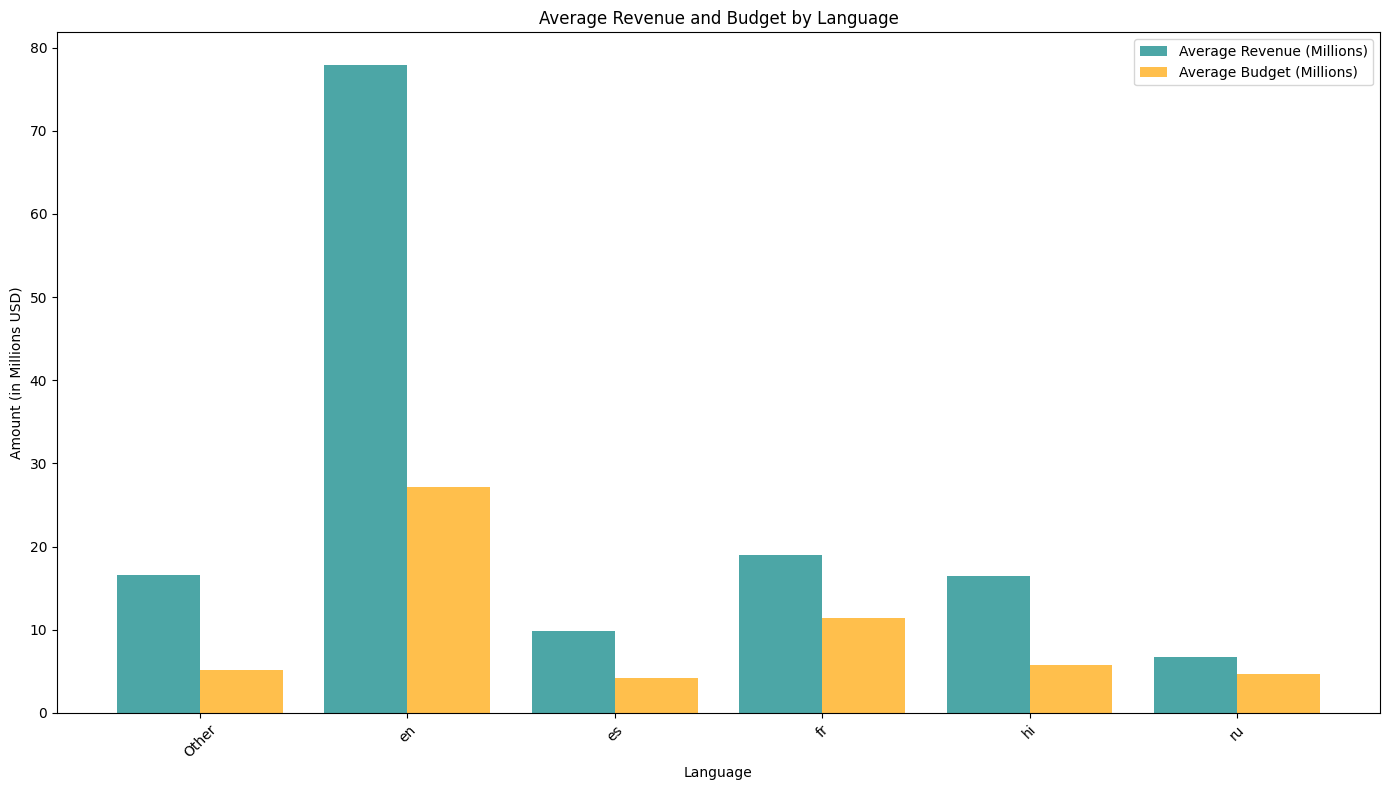

In [ ]:
#REVENUE AND BUDGET BY LANGUAGE
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_df' contains the relevant data

# Identify the top 5 languages by count
top_languages = filtered_df['original_language'].value_counts().nlargest(5).index

# Replace all other languages with 'Other'
filtered_df['language_group'] = filtered_df['original_language'].apply(
    lambda x: x if x in top_languages else 'Other'
)

# Group by language and calculate average revenue and budget
language_stats = filtered_df.groupby('language_group').agg(
    avg_budget=("budget_millions", "mean"),
    avg_revenue=("revenue_millions", "mean")
).reset_index()

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(language_stats))

plt.bar(
    [i - bar_width / 2 for i in index],
    language_stats["avg_revenue"],
    width=bar_width,
    color="teal",
    alpha=0.7,
    label="Average Revenue (Millions)"
)

plt.bar(
    [i + bar_width / 2 for i in index],
    language_stats["avg_budget"],
    width=bar_width,
    color="orange",
    alpha=0.7,
    label="Average Budget (Millions)"
)


plt.xlabel("Language")
plt.ylabel("Amount (in Millions USD)")
plt.title("Average Revenue and Budget by Language")
plt.xticks(range(len(language_stats)), language_stats["language_group"], rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("revenue_budget_by_language.jpg")
plt.show()
